## RNN with the stock price prediction
dataset: 
https://www.kaggle.com/datasets/camnugent/sandp500

Task: Based on data, build an RNN model to predict stock prices:
1. Complete data preprocessing and convert sequence data into data that can be used for RNN input
2. Predict the new data test set and visualize the results
3. Store the prediction results and observe the local prediction results

Remarks: Model structure: single-layer RNN, with 5 neurons at the output; 
use the first 8 data to predict the 9th data each time


In [58]:
import pandas as pd
import numpy as np
data = pd.read_csv("data/all_stocks_5yr.csv")
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [59]:
price = data.loc[:, "close"]
price.head()

0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
Name: close, dtype: float64

In [60]:
# Normalization
price_norm = price/max(price)
price_norm.head()


0    0.007199
1    0.007057
2    0.006964
3    0.007155
4    0.006828
Name: close, dtype: float64

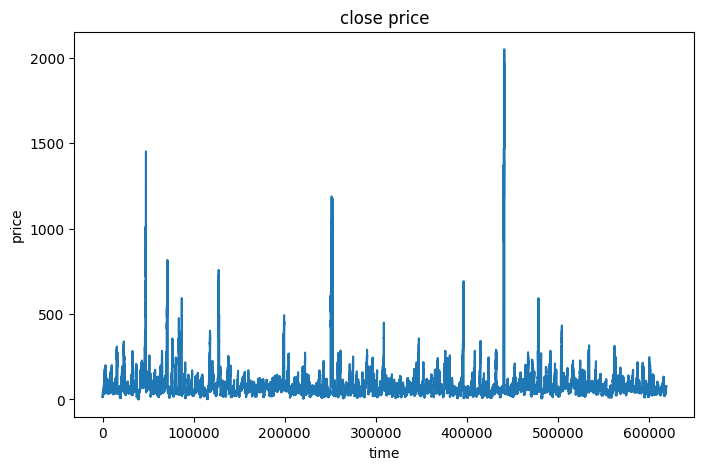

In [61]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.show()


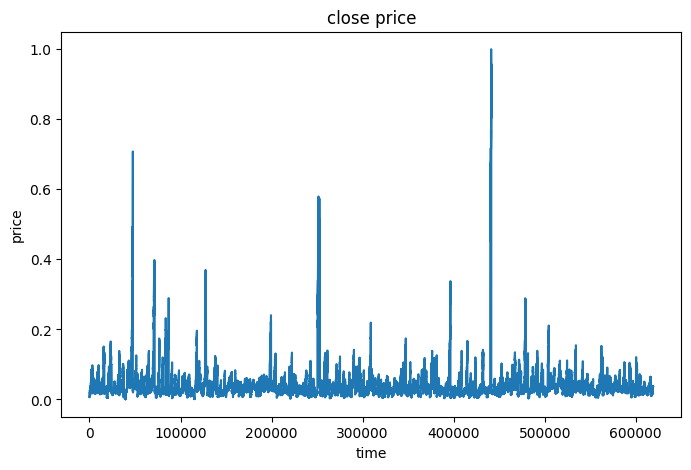

In [62]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price_norm)
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.show()# define X and y


In [63]:


# Define method to extract X and y
def extract_data(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])  # Collect data in the list
        y.append(data[i + time_step])
    X = np.array(X)  # Convert to numpy array after collecting data
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape X to (samples, time_step, features)
    y = np.array(y)  # Convert y to numpy array
    return X, y

In [64]:
time_step = 8

In [65]:
#define X and y
X, y = extract_data(price_norm, time_step)

print(X.shape)


(619032, 8, 1)


In [66]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [67]:
print(X.shape, len(y))
print(X_train.shape)  # (samples_train, time_step, features)
print(X_test.shape)   # (samples_test, time_step, features)
print(y_train.shape)  # (samples_train,)
print(y_test.shape)   # (samples_test,)

(619032, 8, 1) 619032
(495225, 8, 1)
(123807, 8, 1)
(495225,)
(123807,)


In [68]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

model = Sequential()
#add RNN layers
model.add(SimpleRNN(units=5, input_shape=(time_step, 1), activation='relu'))
#add output layer
model.add(Dense(units=1, activation='linear'))
# configure the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [69]:
#train the model 
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
15476/15476 [==============================] - 10s 648us/step - loss: 1.7734e-05
Epoch 2/100
15476/15476 [==============================] - 11s 684us/step - loss: 7.6817e-06
Epoch 3/100
15476/15476 [==============================] - 10s 667us/step - loss: 7.0670e-06
Epoch 4/100
15476/15476 [==============================] - 11s 738us/step - loss: 7.0367e-06
Epoch 5/100
15476/15476 [==============================] - 11s 731us/step - loss: 7.0634e-06
Epoch 6/100
15476/15476 [==============================] - 10s 674us/step - loss: 7.0570e-06
Epoch 7/100
15476/15476 [==============================] - 10s 648us/step - loss: 7.0710e-06
Epoch 8/100
15476/15476 [==============================] - 10s 643us/step - loss: 7.0521e-06
Epoch 9/100
15476/15476 [==============================] - 10s 647us/step - loss: 7.0383e-06
Epoch 10/100
15476/15476 [==============================] - 10s 648us/step - loss: 6.9643e-06
Epoch 11/100
15476/15476 [==============================] - 10s 663us

In [ ]:
# make predictions based on the training data
y_train_predict = model.predict(X) * max(price)
y_train = [i*max(price) for i in y]
print(y_train_predict, y_train)

19345/19345 [==============================] - 6s 303us/step


In [ ]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train, label='real price')
plt.plot(y_train_predict, label='predict price')
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [ ]:
#Make predictions based on the test data
y_test_predict = model.predict(X_test_normal) * max(price)
y_test = [i*max(price) for i in y_test]


In [ ]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y_test, label='real price_test')
plt.plot(y_test_predict, label='predict price_test')
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [ ]:
result_y_test = np.array(y_test).reshape(-1, 1)
result_y_test_predict = y_test_predict
print(result_y_test.shape, result_y_test_predict.shape)
result = np.concatenate((result_y_test, result_y_test_predict),axis=1)
print(result.shape)
result = pd.DataFrame(result, columns=['real_price_test','predict_price_test'])
result.to_csv('result_predict_test.csv')

Summary of RNN stock price prediction:
1. By building an RNN model, the prediction of the next day's stock price based on historical data was realized:
2. Familiar with the data format structure of the RNN model;
3. Mastered the data preprocessing method of digital sequences:
4. The predicted data was stored, and the limitations of RNN for stock price prediction were understood by visualizing local details: information delay


For learning：https://keras.io/api/layers/recurrent_layers/ <br>
Video: https://www.bilibili.com/video/BV1JP4y117mX?spm_id_from=333.788.player.switch&vd_source=6d5e118f93a0d98219382c6023b9dc07&p=5 